# 异常检测实例(Anomaly Detection)

In [80]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('anomaly_data.csv')
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


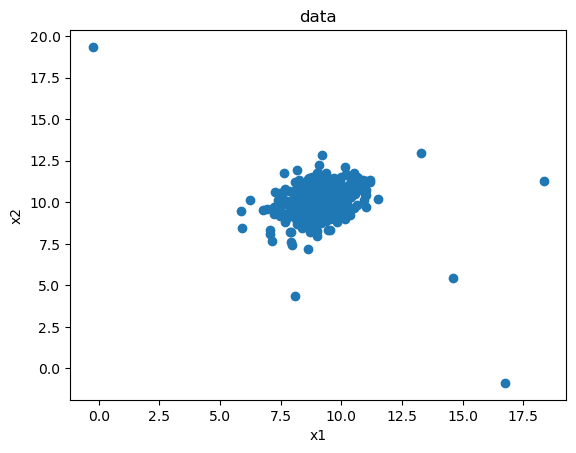

In [81]:
#visualize the data
x = data.loc[:,'x1']
y = data.loc[:,'x2']
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(x,y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('data')
plt.show()


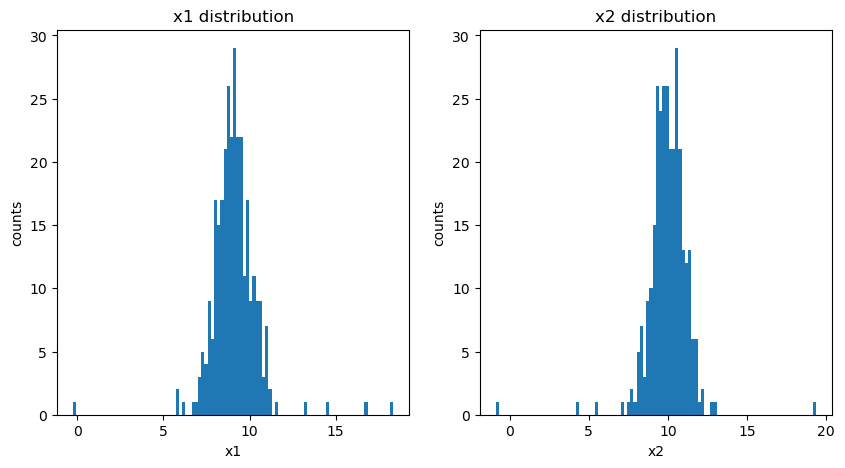

In [82]:
#visualize the distribution
fig2 = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(x,bins=100)
plt.title('x1 distribution')
plt.xlabel('x1')
plt.ylabel('counts')
plt.subplot(122)
plt.hist(y,bins=100)
plt.title('x2 distribution')
plt.xlabel('x2')
plt.ylabel('counts')
plt.show()


In [83]:
# caculate the mean and sigma of x,y
x_mean = x.mean()
x_sigma = x.std()
y_mean = y.mean()
y_sigma = y.std()
print(x_mean,y_mean,x_sigma,y_sigma)

9.112225783931596 9.997710507954398 1.3559573758220915 1.3097071175386399


In [84]:
#calculate the gaussian distribution p(x)
from scipy.stats import norm
x_range = np.linspace(0,20,300)
x_norm = norm.pdf(x_range,x_mean,x_sigma)
y_range = np.linspace(0,20,300)
y_norm = norm.pdf(y_range,y_mean,y_sigma)

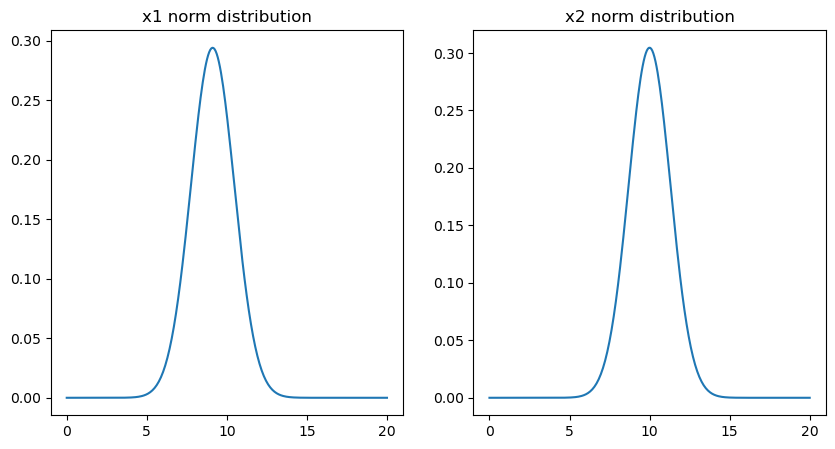

In [85]:
#visualize the posibility distribution function
fig2 = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x_range,x_norm)
plt.title('x1 norm distribution')
plt.subplot(122)
plt.plot(y_range,y_norm)
plt.title('x2 norm distribution')
plt.show()

In [86]:
# establish the model and predict
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(data)

EllipticEnvelope(contamination=0.02)

In [87]:
#make the prediction
y_predict = ad_model.predict(data)
print(pd.value_counts(y_predict))

 1    300
-1      7
Name: count, dtype: int64


C:\Users\00036777\AppData\Local\Temp\ipykernel_832\3478213051.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict))


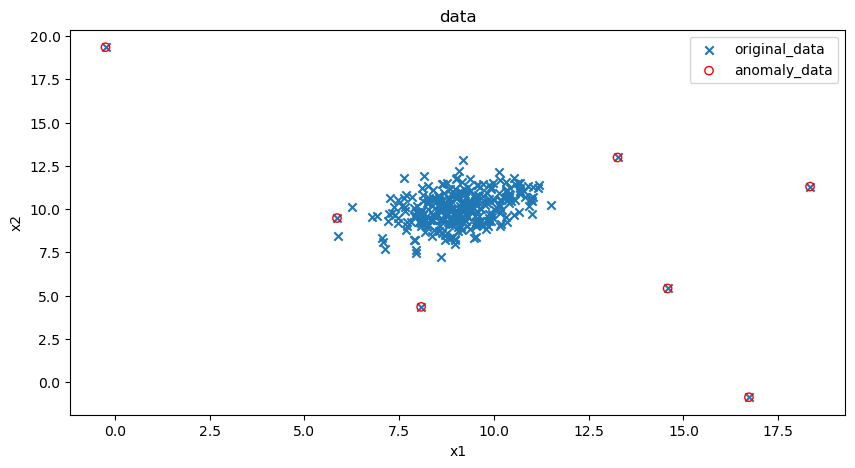

In [88]:
#visualize the result
fig4 = plt.figure(figsize=(10,5))
original_data = plt.scatter(x,y,marker='x')
anomaly_data = plt.scatter(x[y_predict==-1],y[y_predict==-1],marker='o',facecolor = 'none',edgecolors='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('data')
plt.legend((original_data,anomaly_data),('original_data','anomaly_data'))
plt.show()